# PVLIB: Typical Meteorological Years from PVGIS



In [89]:
import pvlib
import pandas as pd
import matplotlib.pyplot as plt

## How to measure GHI, DHI, and DNI 

Definitions: https://pvpmc.sandia.gov/modeling-steps/1-weather-design-inputs/irradiance-and-insolation-2/

* GHI: Pyranometer
* DHI: Pyranometer with tracking shadow ball
* DNI: Pyrheliometer

The following publication introduces a professional integrated irradiance measurement station from Kipp & Zonen.

Geuder, Norbert & Quaschning, Volker & Trieb, Franz & Schillings, Christoph & Lohmann, Sina & Meyer, Richard. (2004). Determination of Reliable Site-Specific Solar Irradiation Data. 805-814. <br>
https://www.researchgate.net/publication/224797513_Determination_of_Reliable_Site-Specific_Solar_Irradiation_Data

Norbert Geuder, Hochschule für Technik Stuttgart: <br>
https://www.researchgate.net/profile/Norbert-Geuder/publication/224780523/figure/fig2/AS:302584221978630@1449153109015/Meteo-station-with-Kipp-Zonen-pyranometers-GHI-DHI-and-pyrheliometer-DNI_W640.jpg


## TMY
* One source of TMY data, PVGIS: <br> https://re.jrc.ec.europa.eu/pvg_tools/en/
* On the European TMY generator: <br> https://joint-research-centre.ec.europa.eu/pvgis-photovoltaic-geographical-information-system/pvgis-tools/tmy-generator_en
* Illuminating explanation how TMYs are determined (or generated): <br> https://pvsc-python-tutorials.github.io/PVSC48-Python-Tutorial/Tutorial%201%20-%20TMY%20Weather%20Data.html#typical-meteorological-year



## Locations

* Pyramids: https://www.openstreetmap.org/note/3243959#map=15/29.9775/31.1277
* Green Fab Lab: https://www.openstreetmap.org/way/804684364


In [90]:
# latitude, longitude, name, altitude, timezone
coordinates = [
    (51.498, 6.549, "GFL", 20.0, "UTC+2"),
    (29.976, 31.134,"Pyramids", 20.0, "UTC+2")
]

In [91]:
coordinates[1][2]

'Pyramids'

In [92]:
? pvlib.iotools.get_pvgis_tmy

Signature:
 pvlib.iotools.get_pvgis_tmy(
    latitude,
    longitude,
    outputformat='json',
    usehorizon=True,
    userhorizon=None,
    startyear=None,
    endyear=None,
    url='https://re.jrc.ec.europa.eu/api/',
    map_variables=None,
    timeout=30,
)
Docstring:
Get TMY data from PVGIS. For more information see the PVGIS [1]_ TMY tool
documentation [2]_.

Parameters
----------
latitude : float
    Latitude in degrees north
longitude : float
    Longitude in degrees east
outputformat : str, default 'json'
    Must be in ``['csv', 'basic', 'epw', 'json']``. See PVGIS TMY tool
    documentation [2]_ for more info.
usehorizon : bool, default True
    include effects of horizon
userhorizon : list of float, default None
    optional user specified elevation of horizon in degrees, at equally
    spaced azimuth clockwise from north, only valid if ``usehorizon`` is
    true, if ``usehorizon`` is true but ``userhorizon`` is ``None`` then
    PVGIS will calculate the horizon [3]_
starty

In [93]:
# Create a dictionary with TMY dataframes for the locations
# tmys = []
tmys = {}
for location in coordinates:
    latitude, longitude, name, altitude, timezone = location
    print(location)
#    print(latitude)
#    print(name)
    weather = pvlib.iotools.get_pvgis_tmy(latitude, longitude, map_variables=True)[0]
    weather.index.name = "utc_time"
#    tmys.append(weather)
    tmys[name] = weather

(51.498, 6.549, 'GFL', 20.0, 'UTC+2')
(29.976, 31.134, 'Pyramids', 20.0, 'UTC+2')


In [94]:
tmys.keys()

dict_keys(['GFL', 'Pyramids'])

In [95]:
tmys["Pyramids"]

,temp_air,relative_humidity,ghi,dni,dhi,IR(h),wind_speed,wind_direction,pressure
utc_time,,,,,,,,,
2007-01-01 00:00:00+00:00,11.85,74.89,0.0,0.0,0.0,275.98,3.80,349.0,102384.0
2007-01-01 01:00:00+00:00,11.86,74.22,0.0,0.0,0.0,276.30,3.78,351.0,102388.0
2007-01-01 02:00:00+00:00,11.87,73.54,0.0,0.0,0.0,276.61,3.77,352.0,102391.0
2007-01-01 03:00:00+00:00,11.88,72.87,0.0,0.0,0.0,276.93,3.75,352.0,102444.0
2007-01-01 04:00:00+00:00,11.88,72.19,0.0,0.0,0.0,277.25,3.73,353.0,102497.0
...,...,...,...,...,...,...,...,...,...
2006-12-31 19:00:00+00:00,11.80,78.26,0.0,0.0,0.0,274.40,3.90,339.0,102351.0
2006-12-31 20:00:00+00:00,11.81,77.59,0.0,0.0,0.0,274.72,3.88,342.0,102361.0
2006-12-31 21:00:00+00:00,11.82,76.91,0.0,0.0,0.0,275.03,3.86,344.0,102368.0


In [96]:
tmys["Pyramids"].keys()

Index(['temp_air', 'relative_humidity', 'ghi', 'dni', 'dhi', 'IR(h)',
       'wind_speed', 'wind_direction', 'pressure'],
      dtype='object')

In [97]:
# 9 columns, 24 * 365 = 8760 hourly values, i.e. rows. 
# leap years are probably not considered. Otherwise the Febuaries would not be comparable.
tmys["Pyramids"].shape

(8760, 9)

In [112]:
tmys["Pyramids"].index.dtype

datetime64[ns, tzutc()]

## Problem: Timestamps not monotonous, not ordered.
The years of the chosen representative months of the TMY are not necessarily ordered. It is recommended to create a "dummy year" to keep the index data type `datetime64` with time zone UTC. Then the data from Jan to Dec will be in one year.

In [2]:
# Create a new data-range for a dummy year from Jan to Dec in hourly resolution.
# Here we choose 2017 to be the dummy year.
newidx = pd.date_range(start = "2017-01-01T00:00:00UTC", periods = 8760, freq = "H")
# Alternative
# newidx = pd.date_range(start = "2017-01-01T00:00:00UTC", end = "2018-01-01T00:00:00UTC", freq = "H", inclusive = "left")

NameError: name 'pd' is not defined

In [99]:
# The new index has to become the new ordered index of the dataframes.
for key in tmys:
    tmys[key].set_index(newidx, inplace = True)

tmys["Pyramids"]

,temp_air,relative_humidity,ghi,dni,dhi,IR(h),wind_speed,wind_direction,pressure
2017-01-01 00:00:00+00:00,11.85,74.89,0.0,0.0,0.0,275.98,3.80,349.0,102384.0
2017-01-01 01:00:00+00:00,11.86,74.22,0.0,0.0,0.0,276.30,3.78,351.0,102388.0
2017-01-01 02:00:00+00:00,11.87,73.54,0.0,0.0,0.0,276.61,3.77,352.0,102391.0
2017-01-01 03:00:00+00:00,11.88,72.87,0.0,0.0,0.0,276.93,3.75,352.0,102444.0
2017-01-01 04:00:00+00:00,11.88,72.19,0.0,0.0,0.0,277.25,3.73,353.0,102497.0
...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00+00:00,11.80,78.26,0.0,0.0,0.0,274.40,3.90,339.0,102351.0
2017-12-31 20:00:00+00:00,11.81,77.59,0.0,0.0,0.0,274.72,3.88,342.0,102361.0
2017-12-31 21:00:00+00:00,11.82,76.91,0.0,0.0,0.0,275.03,3.86,344.0,102368.0
2017-12-31 22:00:00+00:00,11.83,76.24,0.0,0.0,0.0,275.35,3.84,346.0,102374.0


In [100]:
# time interval, e.g. July to slice the data, e.g. to plot the series
t_interval = (newidx >= "2017-07-01") & (newidx < "2017-08-01")

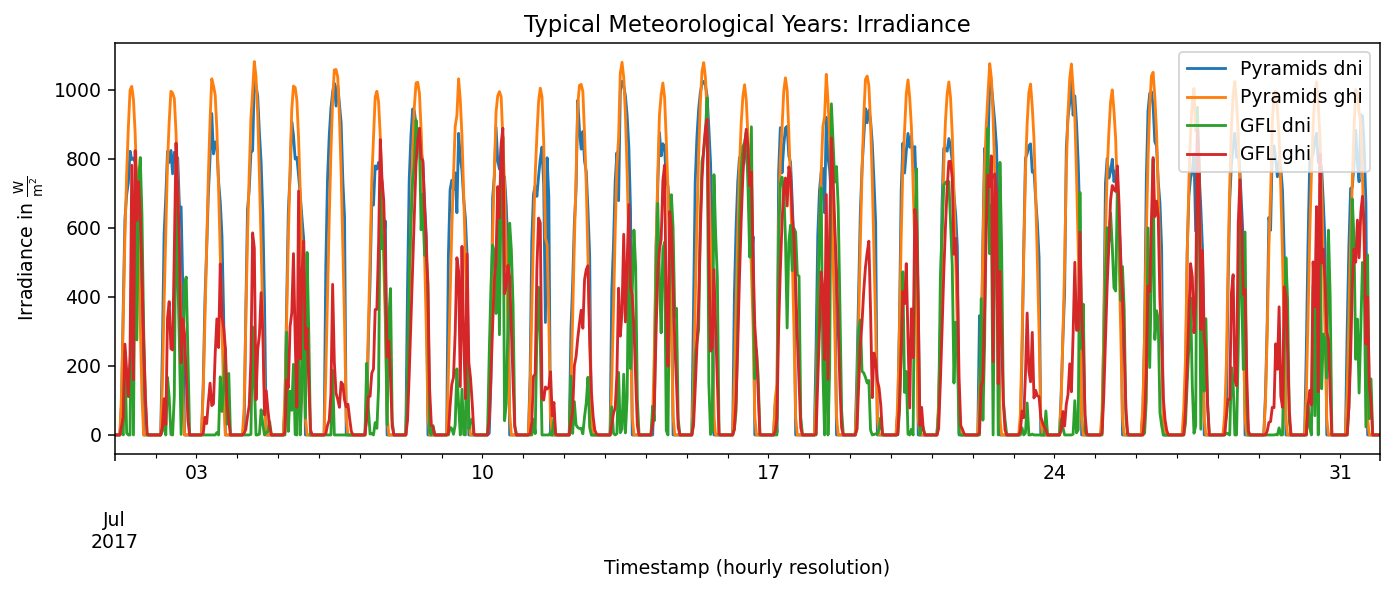

In [111]:
fig1, ax1 = plt.subplots(figsize = (12,4), dpi = 136)
tmys["Pyramids"][t_interval][["dni","ghi"]].plot(ax = ax1, label = "Pyramids")
tmys["GFL"][t_interval][["dni","ghi"]].plot(ax = ax1, label = "GFL")
ax1.set_title(r"Typical Meteorological Years: Irradiance")
ax1.set_xlabel(r"Timestamp (hourly resolution)")
ax1.set_ylabel(r"Irradiance in $\mathrm{\frac{W}{m^2}}$")
ax1.legend(["Pyramids dni","Pyramids ghi","GFL dni","GFL ghi"])
plt.show()